# Cleaning Genius Lyrics Table
Kaggle from here: https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information/data

Here is the table which we derive lyrics. It starts in the format

title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft

Set OpenAI Key

In [17]:
OPENAI_API_KEY = 'INSERT'

In [2]:
import kagglehub

path = kagglehub.dataset_download("carlosgdcj/genius-song-lyrics-with-language-information")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/genius-song-lyrics-with-language-information


In [3]:
import kagglehub
import pandas as pd
import os

csv_path = "../root/.cache/kagglehub/datasets/carlosgdcj/genius-song-lyrics-with-language-information/versions/1/song_lyrics.csv"

df = pd.read_csv(csv_path)
print(f"Original dataset shape: {df.shape}")

print(f"Rows with missing title: {df['title'].isna().sum()}")
print(f"Rows with missing artist: {df['artist'].isna().sum()}")
print(f"Rows with missing lyrics: {df['lyrics'].isna().sum()}")
print(f"Rows with missing language_cld3: {df['language_cld3'].isna().sum()}")
print(f"Language distribution: {df['language_cld3'].value_counts().head()}")

df_cleaned = df.dropna(subset=['title', 'artist', 'lyrics', 'language_cld3'])
df_cleaned = df_cleaned[
    (df_cleaned['title'].str.strip() != '') &
    (df_cleaned['artist'].str.strip() != '') &
    (df_cleaned['lyrics'].str.strip() != '') &
    (df_cleaned['language_cld3'] == 'en')
]

df_cleaned = df_cleaned[['title', 'artist', 'lyrics']]

print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Removed {df.shape[0] - df_cleaned.shape[0]} rows")

output_path = '/content/songs_with_lyrics.csv'
df_cleaned.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

print("\nFirst 5 rows of cleaned dataset:")
print(df_cleaned.head())

Original dataset shape: (5134856, 11)
Rows with missing title: 188
Rows with missing artist: 0
Rows with missing lyrics: 0
Rows with missing language_cld3: 90966
Language distribution: language_cld3
en    3399993
es     279465
fr     190794
pt     169543
ru     166772
Name: count, dtype: int64
Cleaned dataset shape: (3399864, 3)
Removed 1734992 rows
Cleaned dataset saved to: /content/songs_with_lyrics.csv

First 5 rows of cleaned dataset:
               title     artist  \
0          Killa Cam    Cam'ron   
1         Can I Live      JAY-Z   
2  Forgive Me Father   Fabolous   
3       Down and Out    Cam'ron   
4             Fly In  Lil Wayne   

                                              lyrics  
0  [Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...  
1  [Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...  
2  Maybe cause I'm eatin\nAnd these bastards fien...  
3  [Produced by Kanye West and Brian Miller]\n\n[...  
4  [Intro]\nSo they ask me\n"Young boy\nWhat you ...  


# Matching Genius Lyrics w/ MSD

MSD is from here: http://millionsongdataset.com/tasteprofile/#getting

Kaggle Dataset:
https://www.kaggle.com/datasets/bivanmallick/million-song-recoomendation?select=song_data.csv

By joining the MSD dataset, we can develop lyrics, which we can then use to connect to user behavior

In [4]:
path = kagglehub.dataset_download("bivanmallick/million-song-recoomendation")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/million-song-recoomendation


In [5]:
import kagglehub
import pandas as pd
import os

csv_path = "../root/.cache/kagglehub/datasets/bivanmallick/million-song-recoomendation/versions/1/song_data.csv"

df = pd.read_csv(csv_path)
print(f"Original dataset shape: {df.shape}")

print(f"Rows with missing title: {df['title'].isna().sum()}")
print(f"Rows with missing lyrics: {df['artist_name'].isna().sum()}")

df_cleaned = df.dropna(subset=['title', 'artist_name'])
df_cleaned = df_cleaned[
    (df_cleaned['title'].str.strip() != '') &
    (df_cleaned['artist_name'].str.strip() != '')
]

df_cleaned = df_cleaned[['song_id', 'title', 'artist_name']]

print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Removed {df.shape[0] - df_cleaned.shape[0]} rows")

output_path = '/content/msd_songs.csv'
df_cleaned.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

print("\nFirst 5 rows of cleaned dataset:")
print(df_cleaned.head())

Original dataset shape: (1000000, 5)
Rows with missing title: 17
Rows with missing lyrics: 0
Cleaned dataset shape: (999983, 3)
Removed 17 rows
Cleaned dataset saved to: /content/msd_songs.csv

First 5 rows of cleaned dataset:
              song_id              title       artist_name
0  SOQMMHC12AB0180CB8       Silent Night  Faster Pussy cat
1  SOVFVAK12A8C1350D9        Tanssi vaan  Karkkiautomaatti
2  SOGTUKN12AB017F4F1  No One Could Ever    Hudson Mohawke
3  SOBNYVR12A8C13558C      Si Vos Querés       Yerba Brava
4  SOHSBXH12A8C13B0DF   Tangle Of Aspens        Der Mystic


In [6]:
import pandas as pd

songs_with_lyrics = pd.read_csv('/content/songs_with_lyrics.csv')  # title, artist, lyrics
msd_songs = pd.read_csv('/content/msd_songs.csv')  # song_id, title, artist_name, lyrics

print("Original table sizes:")
print(f"songs_with_lyrics: {len(songs_with_lyrics)} rows")
print(f"msd_songs: {len(msd_songs)} rows")

print("\nColumn info:")
print(f"songs_with_lyrics columns: {list(songs_with_lyrics.columns)}")
print(f"msd_songs columns: {list(msd_songs.columns)}")

songs_with_lyrics['title_clean'] = songs_with_lyrics['title'].str.strip().str.lower()
songs_with_lyrics['artist_clean'] = songs_with_lyrics['artist'].str.strip().str.lower()

msd_songs['title_clean'] = msd_songs['title'].str.strip().str.lower()
msd_songs['artist_clean'] = msd_songs['artist_name'].str.strip().str.lower()

merged_table = pd.merge(
    msd_songs,
    songs_with_lyrics,
    left_on=['title_clean', 'artist_clean'],
    right_on=['title_clean', 'artist_clean'],
    how='inner',
    suffixes=('', '_from_songs')
)

final_table = merged_table[['song_id', 'title', 'artist_name', 'lyrics']].copy()

final_table = final_table.drop_duplicates()

print(f"\n Joined table created!")
print(f"Number of matched rows: {len(final_table)}")
print(f"Columns: {list(final_table.columns)}")

print(f"\nFirst 10 rows of joined table:")
print(final_table.head(10))

final_table.to_csv('/content/joined_songs.csv', index=False)
print(f"\nJoined table saved to: /content/joined_songs.csv")

Original table sizes:
songs_with_lyrics: 3399864 rows
msd_songs: 999983 rows

Column info:
songs_with_lyrics columns: ['title', 'artist', 'lyrics']
msd_songs columns: ['song_id', 'title', 'artist_name']

 Joined table created!
Number of matched rows: 189503
Columns: ['song_id', 'title', 'artist_name', 'lyrics']

First 10 rows of joined table:
              song_id                  title      artist_name  \
0  SOMPVQB12A8C1379BB                 Pilots        Tiger Lou   
1  SOSDCFG12AB0184647                    006  Lena Philipsson   
2  SOKOVRQ12A8C142811      Ethos of Coercion      Dying Fetus   
3  SOIMMJJ12AF72AD643            Rock-N-Rule            Emery   
4  SOKLPMH12AB01861FA         In The Journey    Martin Sexton   
5  SOWUMAZ12A67ADE769         Take As Needed          Skinlab   
6  SOOLRHW12A8C142643  All of the same blood          Kreator   
7  SOLRKBF12A8C13C88A          Throw It Away      Cobra Verde   
8  SOBDLRM12A8C13A0AC    Before He Kissed Me      Lisa Brokop   
9  SO

# Triplet Cleanup

1. Remove any values from my joined_songs.csv table, if the song_id doesn't exist anywhere in "triplets.csv"
2. Remove any rows in triplets.csv referencing a song_id that doesn't exist in our joined_songs.csv

In [7]:
!cp ../root/.cache/kagglehub/datasets/bivanmallick/million-song-recoomendation/versions/1/triplets_file.csv /content/triplets.csv

Clean triplets.csv

In [ ]:
import pandas as pd

joined_songs = pd.read_csv('/content/joined_songs.csv')
triplets = pd.read_csv('/content/triplets.csv')

print("Original file sizes:")
print(f"joined_songs.csv: {len(joined_songs):,} rows")
print(f"triplets.csv: {len(triplets):,} rows")

song_ids_in_joined = set(joined_songs['song_id'].unique())

print(f"\nUnique song_ids in joined_songs: {len(song_ids_in_joined):,}")

triplets_cleaned = triplets[triplets['song_id'].isin(song_ids_in_joined)].copy()

print(f"\n CLEANING triplets.csv:")
print(f"Original rows: {len(triplets):,}")
print(f"Cleaned rows: {len(triplets_cleaned):,}")
print(f"Rows removed: {len(triplets) - len(triplets_cleaned):,}")

print(f"\n CLEANED triplets.csv - First 10 rows:")
print(triplets_cleaned.head(10))

triplets_cleaned.to_csv('/content/triplets_cleaned.csv', index=False)
print(f"\n File saved: /content/triplets_cleaned.csv ({len(triplets_cleaned):,} rows)")

print(f"\n STATS:")
print(f"Unique users: {triplets_cleaned['user_id'].nunique():,}")
print(f"Unique songs: {triplets_cleaned['song_id'].nunique():,}")
print(f"Total listening events: {len(triplets_cleaned):,}")
print(f"Average listens per song: {triplets_cleaned['listen_count'].mean():.2f}")
print(f"Max listens for a song: {triplets_cleaned['listen_count'].max():,}")

Clean joined_songs.*csv*

In [ ]:
import pandas as pd

joined_songs = pd.read_csv('/content/joined_songs.csv')
triplets = pd.read_csv('/content/triplets_cleaned.csv') # NOTICE THIS IS CLEANED TRIPLETS

print("Original file sizes:")
print(f"joined_songs.csv: {len(joined_songs):,} rows")
print(f"triplets.csv: {len(triplets):,} rows")

song_ids_in_triplets = set(triplets['song_id'].unique())

print(f"\nUnique song_ids in triplets: {len(song_ids_in_triplets):,}")

joined_songs_cleaned = joined_songs[joined_songs['song_id'].isin(song_ids_in_triplets)].copy()

print(f"\n🧹 CLEANING joined_songs.csv:")
print(f"Original rows: {len(joined_songs):,}")
print(f"Cleaned rows: {len(joined_songs_cleaned):,}")
print(f"Rows removed: {len(joined_songs) - len(joined_songs_cleaned):,}")

print(f"\n CLEANED joined_songs.csv - First 10 rows:")
print(joined_songs_cleaned.head(10))

joined_songs_cleaned.to_csv('/content/joined_songs_cleaned.csv', index=False)
print(f"\n File saved: /content/joined_songs_cleaned.csv ({len(joined_songs_cleaned):,} rows)")

print(f"\n STATS:")
print(f"Unique songs remaining: {joined_songs_cleaned['song_id'].nunique():,}")
print(f"Unique artists: {joined_songs_cleaned['artist_name'].nunique():,}")

# Get Safety Scores

In [25]:
import pandas as pd
import requests
import json
import time
import os

def moderate_text(lyrics):
    """Send lyrics to OpenAI moderation API and return safety scores"""
    url = "https://api.openai.com/v1/moderations"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {OPENAI_API_KEY}"
    }
    data = {
        "model": "omni-moderation-latest",
        "input": lyrics
    }

    while True:
        try:
            response = requests.post(url, headers=headers, json=data, timeout=30)
            response.raise_for_status()
            result = response.json()

            scores = result['results'][0]['category_scores']
            safety_scores = {
                'sexual': scores['sexual'],
                'harassment': scores['harassment'],
                'harassment/threatening': scores['harassment/threatening'],
                'hate': scores['hate'],
                'hate/threatening': scores['hate/threatening'],
                'illicit': scores['illicit'],
                'illicit/violent': scores['illicit/violent'],
                'violence': scores['violence'],
                'violence/graphic': scores['violence/graphic']
            }

            return json.dumps(safety_scores)

        except Exception as e:
            print(f"Error processing text: {e}, retrying in 2 seconds...")
            time.sleep(2)

df = pd.read_csv('joined_songs_cleaned.csv')

if 'safety_scores' not in df.columns:
    df['safety_scores'] = None

rows_to_process = df[df['safety_scores'].isna()]
print(f"Found {len(rows_to_process)} rows to process out of {len(df)} total rows")

if len(rows_to_process) == 0:
    print("All rows already processed!")
    exit()

processed_count = 0
for idx, row in rows_to_process.iterrows():
    print(f"Processing row {idx + 1}/{len(df)}: {processed_count + 1} completed")

    safety_scores = moderate_text(row['lyrics'])
    df.at[idx, 'safety_scores'] = safety_scores

    processed_count += 1

    if processed_count % 50 == 0:
        df.to_csv('joined_songs_cleaned.csv', index=False)
        print(f"Progress saved after {processed_count} rows")

    time.sleep(2)

df.to_csv('joined_songs_cleaned.csv', index=False)
print(f"Done! Processed {processed_count} rows. Saved to joined_songs_cleaned.csv")

Found 2084 rows to process out of 4824 total rows
Processing row 2741/4824: 1 completed
Processing row 2742/4824: 2 completed
Processing row 2743/4824: 3 completed
Processing row 2744/4824: 4 completed
Processing row 2745/4824: 5 completed
Processing row 2746/4824: 6 completed
Processing row 2747/4824: 7 completed
Processing row 2748/4824: 8 completed
Processing row 2749/4824: 9 completed
Processing row 2750/4824: 10 completed
Processing row 2751/4824: 11 completed
Processing row 2752/4824: 12 completed
Processing row 2753/4824: 13 completed
Processing row 2754/4824: 14 completed
Processing row 2755/4824: 15 completed
Processing row 2756/4824: 16 completed
Processing row 2757/4824: 17 completed
Error processing text: 429 Client Error: Too Many Requests for url: https://api.openai.com/v1/moderations, retrying in 2 seconds...
Processing row 2758/4824: 18 completed
Error processing text: 429 Client Error: Too Many Requests for url: https://api.openai.com/v1/moderations, retrying in 2 seco

Loaded 4824 songs with safety scores


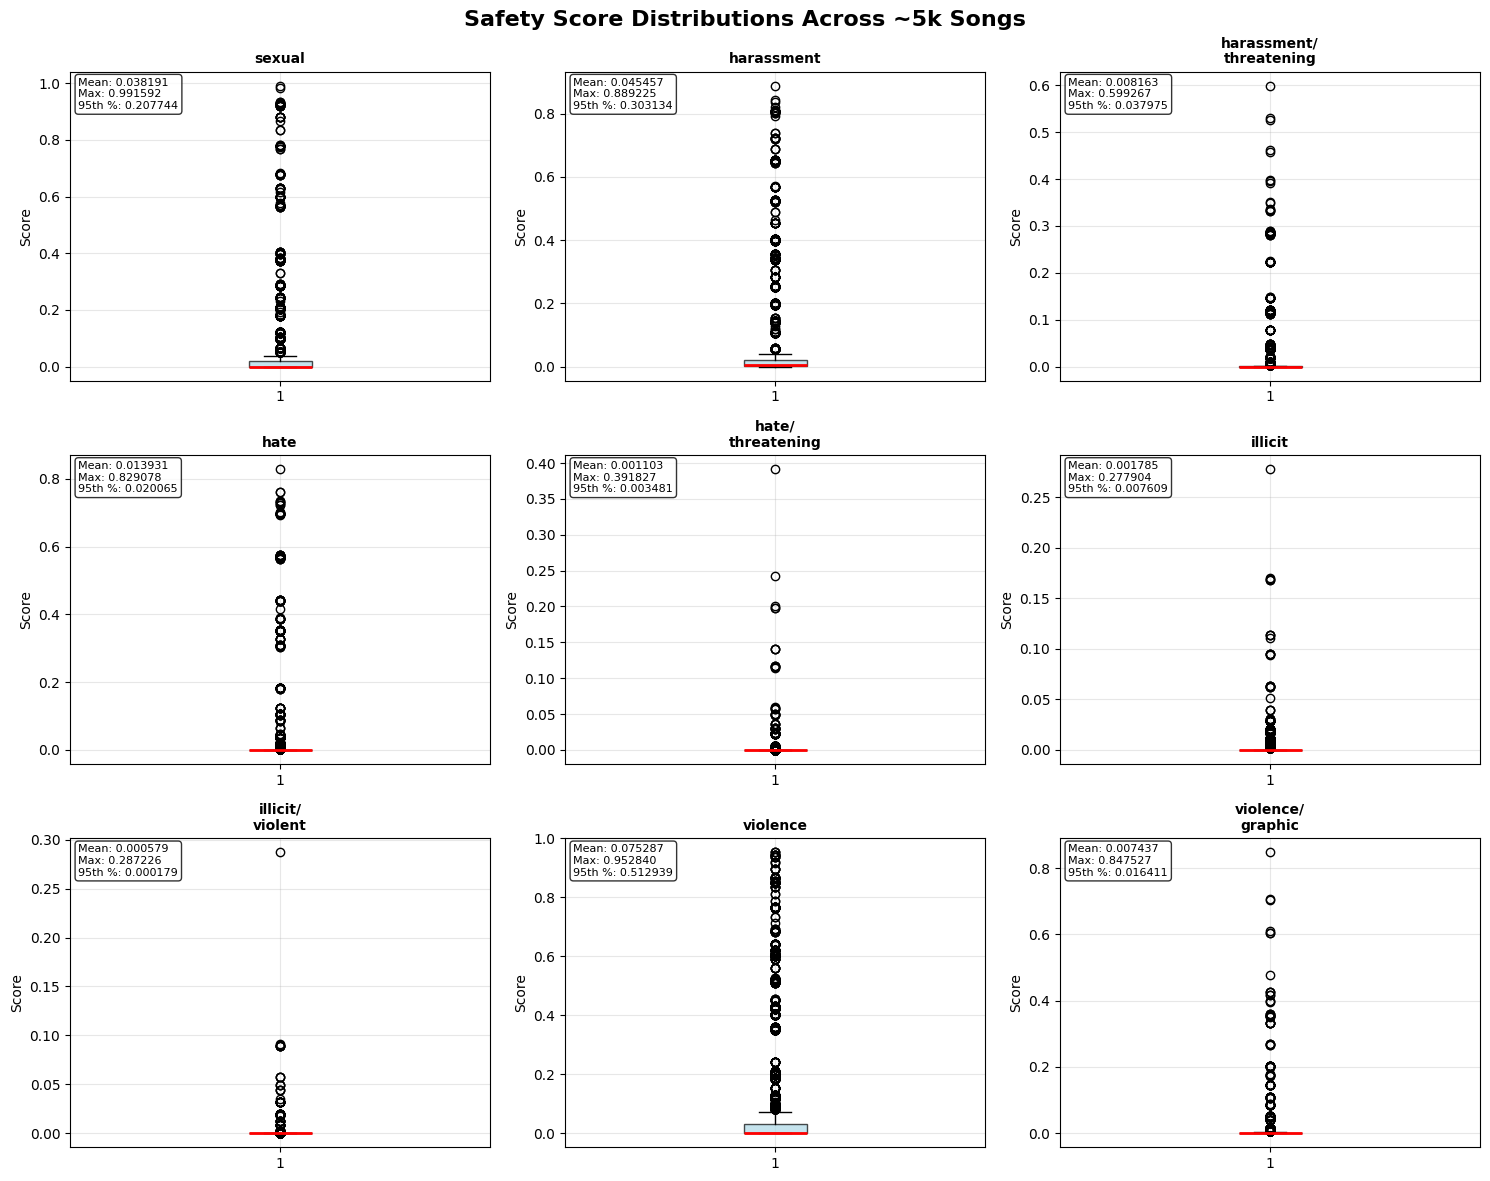

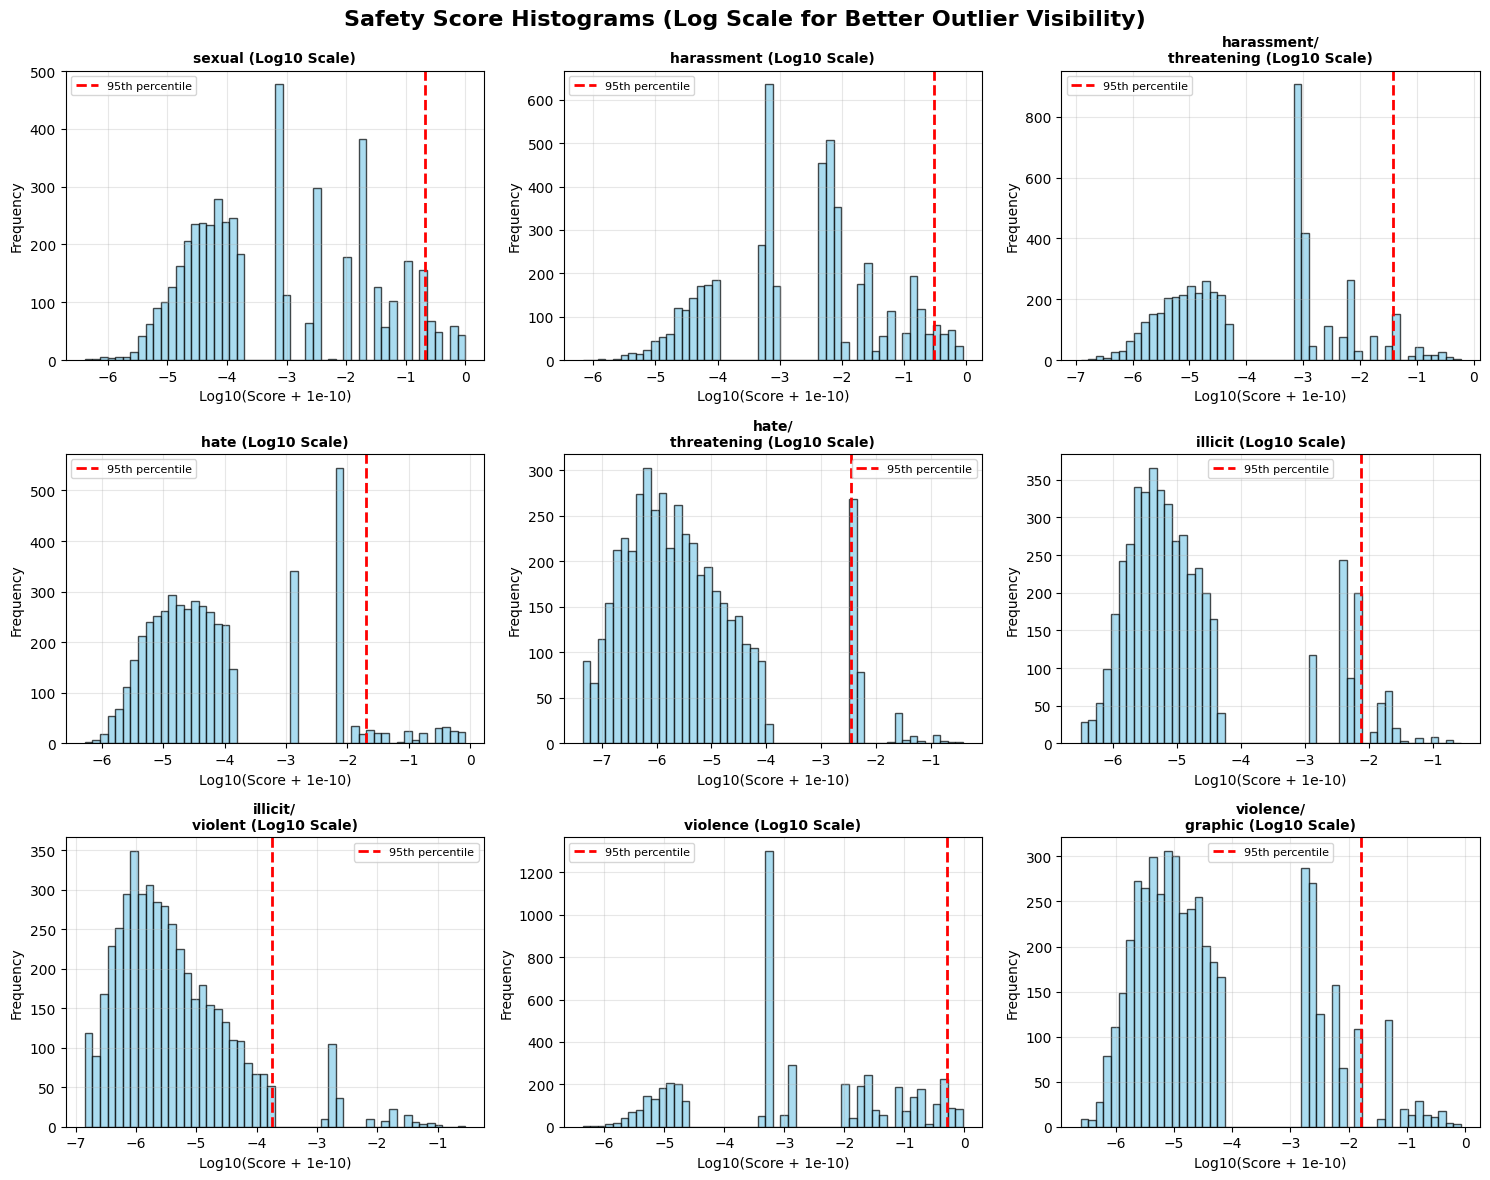


TOP 10 OUTLIERS BY CATEGORY

SEXUAL:
----------------------------------------
0.991592 - Eminem - FACK
0.984762 - David Banner - Play
0.932267 - Big Tymers - Snake
0.931898 - Tech N9ne - Nasty Girl
0.931142 - Slightly Stoopid - Till It Gets Wet
0.930406 - Bloodhound Gang - The Ballad Of Chasey Lain
0.928911 - The Lonely Island - Like A Boss
0.927640 - Jill Scott - Crown Royal
0.927389 - Eminem - Insane
0.927261 - Make the Girl Dance - Kill Me

HARASSMENT:
----------------------------------------
0.889225 - Nick Lowe - All Men Are Liars
0.842322 - Hot Chip - Bad Luck
0.838708 - 50 Cent - Heat
0.822450 - Kid Dynamite - Showoff
0.810436 - Devo - Mongoloid
0.810206 - Wu-Tang Clan - Method Man
0.810129 - Eminem - Big Weenie
0.810129 - Kate Nash - Do-Wah-Doo
0.810052 - Eminem - Underground
0.809742 - Jay-Z - Threat

HARASSMENT/THREATENING:
----------------------------------------
0.599267 - NOFX - Murder The Government
0.531005 - Eminem - Criminal
0.526335 - 50 Cent - Heat
0.461198 - Brand 

In [30]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('joined_songs_cleaned.csv')
safety_categories = []
for idx, row in df.iterrows():
    if pd.notna(row['safety_scores']):
        try:
            scores = json.loads(row['safety_scores'])
            scores['song_id'] = row['song_id']
            safety_categories.append(scores)
        except:
            continue

scores_df = pd.DataFrame(safety_categories)
print(f"Loaded {len(scores_df)} songs with safety scores")

categories = [col for col in scores_df.columns if col != 'song_id']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Safety Score Distributions Across ~5k Songs', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, category in enumerate(categories):
    ax = axes[i]

    box_plot = ax.boxplot(scores_df[category], patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))

    title_text = category.replace("/", "/\n")
    ax.set_title(title_text, fontweight='bold', fontsize=10)
    ax.set_ylabel('Score')
    ax.grid(True, alpha=0.3)

    mean_val = scores_df[category].mean()
    max_val = scores_df[category].max()
    q75 = scores_df[category].quantile(0.75)
    q95 = scores_df[category].quantile(0.95)

    stats_text = f'Mean: {mean_val:.6f}\nMax: {max_val:.6f}\n95th %: {q95:.6f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(3, 3, figsize=(15, 12))
fig2.suptitle('Safety Score Histograms (Log Scale for Better Outlier Visibility)', fontsize=16, fontweight='bold')
axes2 = axes2.flatten()

for i, category in enumerate(categories):
    ax = axes2[i]

    data = scores_df[category]
    data_log = np.log10(data + 1e-10)

    ax.hist(data_log, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    title_text = category.replace("/", "/\n")
    ax.set_title(f'{title_text} (Log10 Scale)', fontweight='bold', fontsize=10)
    ax.set_xlabel('Log10(Score + 1e-10)')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

    p95_log = np.log10(scores_df[category].quantile(0.95) + 1e-10)
    ax.axvline(p95_log, color='red', linestyle='--', linewidth=2,
               label=f'95th percentile')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP 10 OUTLIERS BY CATEGORY")
print("="*60)

for category in categories:
    print(f"\n{category.upper()}:")
    print("-" * 40)

    top_outliers = scores_df.nlargest(10, category)[['song_id', category]]

    for _, row in top_outliers.iterrows():
        song_info = df[df['song_id'] == row['song_id']].iloc[0]
        print(f"{row[category]:.6f} - {song_info['artist_name']} - {song_info['title']}")

print(f"\nTotal songs analyzed: {len(scores_df)}")
print(f"Categories analyzed: {len(categories)}")